In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

confusion matrix function


In [2]:
def plot_confusion_matrix(y,y_pridict):
  from sklearn.metrics import confusion_matrix

  cm = confusion_matrix(y, y_pridict)
  ax = plt.subplot()
  sns.heatmap(cm, annot= True, ax = ax)
  ax.set_xlabel('Predicted labels')
  ax.set_ylabel('True labels')
  ax.set_title('Confusion Matrix')
  ax.xaxis.set_ticklabels(['did not land', 'land']); ax.yaxis.set_ticklabels(['did not land', 'landed'])
  plt.show()

import Dataset

In [3]:
data = pd.read_csv("dataset1_out.csv")

In [4]:
data.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Booster landing
0,1,04-06-2010,Falcon 9,6123.547647,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1,0,B0003,-80.577366,28.561857,0
1,2,22-05-2012,Falcon 9,525.000000,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1,0,B0005,-80.577366,28.561857,0
2,3,01-03-2013,Falcon 9,677.000000,ISS,CCSFS SLC 40,None None,1,False,False,False,NaN,1,0,B0007,-80.577366,28.561857,0
3,4,29-09-2013,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1,0,B1003,-120.610829,34.632093,0
4,5,03-12-2013,Falcon 9,3170.000000,GTO,CCSFS SLC 40,None None,1,False,False,False,NaN,1,0,B1004,-80.577366,28.561857,0


In [5]:
X = pd.read_csv("dataset_part_3.csv")

In [6]:
X.head()

,Flight No.,Payload mass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Serial,Orbit_GTO,...,Orbit_Sub-orbital,Launch site_CCAFS,Launch site_Cape Canaveral,Launch site_KSC,Launch site_VAFB,LandingPad_5e9e3032383ecb267a34e7c7,LandingPad_5e9e3032383ecb554034e7c9,LandingPad_5e9e3032383ecb6bb234e7ca,LandingPad_5e9e3032383ecb761634e7cb,LandingPad_5e9e3033383ecbb9e534e7cc
0,1,0.0,1,False,False,False,1,0,B0003,0,...,0,1,0,0,0,0,0,0,0,0
1,2,525.0,1,False,False,False,1,0,B0005,0,...,0,1,0,0,0,0,0,0,0,0
2,3,4877.0,1,False,False,False,1,0,B0007,0,...,0,1,0,0,0,0,0,0,0,0
3,4,500.0,1,False,False,False,1,0,B1003,0,...,0,0,0,0,1,0,0,0,0,0
4,5,3170.0,1,False,False,False,1,0,B1004,1,...,0,1,0,0,0,0,0,0,0,0


In [7]:
X.drop(columns=['Serial'],inplace = True)

In [8]:
X = X.fillna(X.mean())

Task 1

In [9]:
Y = data['Booster landing'].to_numpy()

In [10]:
Y

array([0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1])

Task 2

In [11]:
transformer = preprocessing.StandardScaler()

In [12]:
X = transformer.fit_transform( X )

Task 3

In [13]:
X_train, X_test, Y_train, Y_test= train_test_split(X,Y, test_size = 0.2, random_state=2)

In [14]:
Y_test.shape

(18,)

Task 4

In [15]:
parameters = {'C':[0.01,0.1,1],
              'penalty':['l2'],
              'solver':['lbfgs']}

In [16]:
LR = LogisticRegression()

In [17]:
logreg_cv = GridSearchCV(estimator = LR,param_grid=parameters,cv= 10)

In [18]:
logreg_cv.fit(X_train,Y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1], 'penalty': ['l2'],
                         'solver': ['lbfgs']})

In [19]:
print("tuned hyperparameters :(best parameters)",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hyperparameters :(best parameters) {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
accuracy : 0.8464285714285713


Task 5

In [20]:
LR_accuracy = logreg_cv.score(X_test,Y_test)
LR_accuracy

0.8333333333333334

In [21]:
yhat_LR = logreg_cv.predict(X_test)

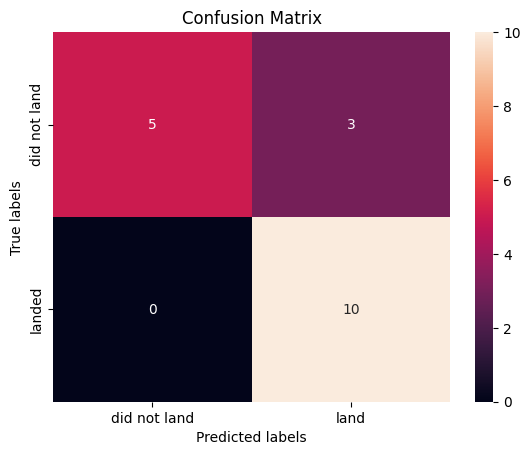

In [22]:
plot_confusion_matrix(Y_test,yhat_LR)

In [23]:
report_LR = classification_report(Y_test, yhat_LR)
print(report_LR)

              precision    recall  f1-score   support

           0       1.00      0.62      0.77         8
           1       0.77      1.00      0.87        10

    accuracy                           0.83        18
   macro avg       0.88      0.81      0.82        18
weighted avg       0.87      0.83      0.82        18



Task 6

In [24]:
parameters = {'kernel':('linear', 'rbf','poly','rbf', 'sigmoid'),
              'C': np.logspace(-3, 3, 5),
              'gamma':np.logspace(-3, 3, 5)}

In [25]:
svm = SVC()

In [26]:
svm_cv = GridSearchCV(estimator = svm,param_grid=parameters,cv= 10)

In [27]:
svm_cv.fit(X_train,Y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': array([1.00000000e-03, 3.16227766e-02, 1.00000000e+00, 3.16227766e+01,
       1.00000000e+03]),
                         'gamma': array([1.00000000e-03, 3.16227766e-02, 1.00000000e+00, 3.16227766e+01,
       1.00000000e+03]),
                         'kernel': ('linear', 'rbf', 'poly', 'rbf', 'sigmoid')})

In [28]:
print("tuned hpyerparameters :(best parameters) ",svm_cv.best_params_)
print("accuracy :",svm_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 1000.0, 'gamma': 0.03162277660168379, 'kernel': 'rbf'}
accuracy : 0.8607142857142858


Task 7

In [29]:
SVM_accuracy = svm_cv.score(X_test,Y_test)
SVM_accuracy

0.9444444444444444

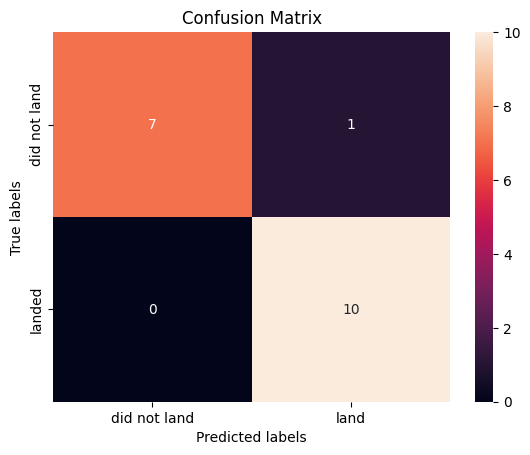

In [30]:
yhat_svm = svm_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat_svm)

In [31]:
report_svm = classification_report(Y_test, yhat_svm)
print(report_svm)

              precision    recall  f1-score   support

           0       1.00      0.88      0.93         8
           1       0.91      1.00      0.95        10

    accuracy                           0.94        18
   macro avg       0.95      0.94      0.94        18
weighted avg       0.95      0.94      0.94        18



Task 8

In [32]:
parameters = {'criterion': ['gini', 'entropy'],
     'splitter': ['best', 'random'],
     'max_depth': [2*n for n in range(1,10)],
     'max_features': ['auto', 'sqrt'],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10]}

In [33]:
tree = DecisionTreeClassifier()

In [34]:
tree_cv = GridSearchCV(estimator = tree, param_grid = parameters, cv = 10)

In [35]:
tree_cv.fit(X_train,Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
3240 fits failed out of a total of 6480.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3240 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/u

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10, 12, 14, 16, 18],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']})

In [36]:
print("tuned hpyerparameters :(best parameters) ",tree_cv.best_params_)
print("accuracy :",tree_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'criterion': 'entropy', 'max_depth': 4, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 2, 'splitter': 'random'}
accuracy : 0.8892857142857142


Task 9

In [37]:
Tree_accuracy = tree_cv.score(X_test,Y_test)
Tree_accuracy

0.8333333333333334

In [38]:
yhat_tree = tree_cv.predict(X_test)

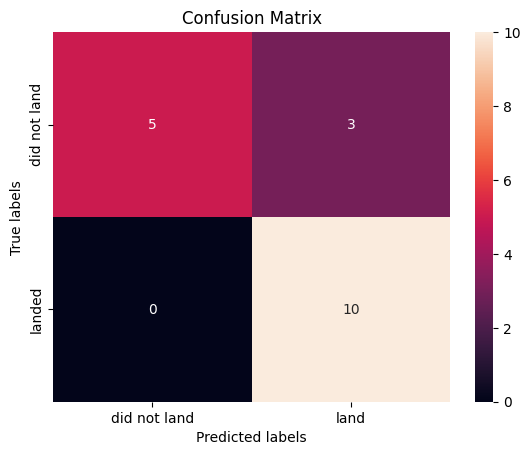

In [39]:
plot_confusion_matrix(Y_test,yhat_tree)

In [40]:
report_tree = classification_report(Y_test, yhat_tree)
print(report_tree)

              precision    recall  f1-score   support

           0       1.00      0.62      0.77         8
           1       0.77      1.00      0.87        10

    accuracy                           0.83        18
   macro avg       0.88      0.81      0.82        18
weighted avg       0.87      0.83      0.82        18



Task 10

In [41]:
parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1,2]}


In [42]:
KNN = KNeighborsClassifier()

In [43]:
knn_cv = GridSearchCV(estimator = KNN, param_grid = parameters, cv =10)

In [44]:
knn_cv.fit(X_train,Y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'p': [1, 2]})

In [45]:
print("tuned hpyerparameters :(best parameters) ",knn_cv.best_params_)
print("accuracy :",knn_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'algorithm': 'auto', 'n_neighbors': 5, 'p': 1}
accuracy : 0.8875


Task 11

In [46]:
KNN_accuracy = knn_cv.score(X_test,Y_test)
KNN_accuracy

0.8333333333333334

In [47]:
yhat_knn = knn_cv.predict(X_test)

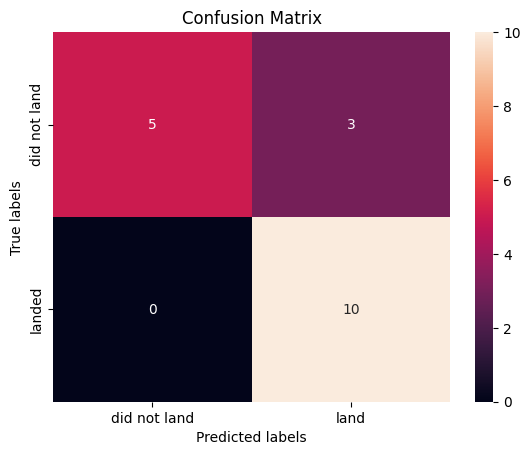

In [48]:
plot_confusion_matrix(Y_test,yhat_knn)

In [49]:
report_knn = classification_report(Y_test, yhat_knn)
print(report_knn)

              precision    recall  f1-score   support

           0       1.00      0.62      0.77         8
           1       0.77      1.00      0.87        10

    accuracy                           0.83        18
   macro avg       0.88      0.81      0.82        18
weighted avg       0.87      0.83      0.82        18



Task 12

In [51]:
models = ['Logistic Regression', 'SVM', 'Decision Tree', 'KNN']

accuracy_scores = [LR_accuracy,SVM_accuracy,Tree_accuracy,KNN_accuracy]

report = pd.DataFrame({
    'Model': models,
    'Accuracy': accuracy_scores
})

print(report)

                 Model  Accuracy
0  Logistic Regression  0.833333
1                  SVM  0.944444
2        Decision Tree  0.833333
3                  KNN  0.833333


In [52]:
max_value_row = report.loc[report['Accuracy'].idxmax()]
max_model = max_value_row['Model']
max_accuracy = max_value_row['Accuracy']

In [53]:
print("The model with maximum accuracy is "+ max_model + " with accuracy of: " + str(max_accuracy))

The model with maximum accuracy is SVM with accuracy of: 0.9444444444444444
